---
title: "Data Exploration"
format: html
---

Now I will attempt to get a better understanding of my record data through exploratory data analysis. By calculating and reporting basic summary statistics, I will know the central tendency, spread, and extremes of my variables. This can reveal flaws or inaccuracies in the data and provide us with insight into the distribution of the data. I will also create some data visualizations. There is a plethora of graphs I can make with all the variables I have. Since I already know what algorithms I will be using and what I want to achieve with my models, I will just create a few to show some general relationships and inspire other rabbit holes I could go down if I choose. Like I said before, some of my variables are closely related and correlated, so now we will finally visualize these correlations. Lastly, I will examine the outliers I have and decide what actions I should take with the outliers.

# Descriptive Statistics

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
df = pd.read_csv('./data/RecordData.csv')
df.head()

,Year,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),...,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,RegionName,Typical Home Value
0,2018,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,...,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.047111,Alabama,0.038688
1,2019,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,...,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.036934,Alabama,0.070360
2,2021,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,...,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.082710,Alabama,0.263465
3,2022,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,...,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,-0.125037,Alabama,0.076587
4,2018,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,...,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.026241,Alaska,0.005789


In [15]:
pd.set_option('display.max_columns',None)
df.describe(include='all')

,Year,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),"Some college, no degree",Associates degree,Bachelors degree,Number of people employed,Number of people unemployed,Median Household Income,Mean Household Income,"Median earnings for male full-time, year-round workers","Median earnings for female full-time, year-round workers",Occupied Housing Units,Total Housing Units,Median Rooms,Renter Occupied Housing Units,Mean Rent Paid,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,RegionName,Typical Home Value
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204,204.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
mean,2020.000000,0.020044,-0.050633,-0.069625,-0.089833,-0.206925,0.524127,-0.109497,-0.220982,0.093385,0.349233,-0.113733,0.205185,0.012061,-0.022911,0.054935,0.056360,0.049179,0.053833,0.020044,0.010245,0.003344,0.008161,0.056447,0.006469,0.002941,0.005769,-0.021826,0.001579,0.059462,0.019590,0.019030,NaN,0.110084
std,1.585028,0.017131,0.120031,0.157685,0.232427,0.365501,0.945060,0.198461,0.329615,0.215643,0.653535,0.248473,0.332987,0.023825,0.253585,0.029235,0.025530,0.039958,0.044326,0.017131,0.012175,0.012598,0.030682,0.033730,0.010885,0.007600,0.005859,0.059540,0.112276,0.268675,0.078313,0.110523,NaN,0.099373
min,2018.000000,-0.009240,-0.355454,-0.490505,-0.554143,-0.888434,-0.346730,-0.656774,-0.870279,-0.112117,-0.144863,-0.869612,-0.246902,-0.083615,-0.522982,-0.023606,-0.019416,-0.050021,-0.069051,-0.009240,-0.040806,-0.050000,-0.073401,-0.019983,-0.050583,-0.020735,-0.010390,-0.383837,-0.387319,-0.578552,-0.274559,-0.476645,NaN,-0.016960
25%,2018.750000,0.009339,-0.065194,-0.128874,-0.290981,-0.361259,-0.017399,-0.161193,-0.355393,-0.013111,-0.016380,-0.142606,0.023646,-0.001067,-0.169444,0.034074,0.038350,0.019872,0.024355,0.009339,0.004823,0.000000,-0.009801,0.031688,-0.000028,-0.001061,0.002532,-0.017285,-0.032278,-0.078743,-0.013964,0.000514,NaN,0.049067
50%,2020.000000,0.016837,0.004610,-0.002334,-0.026105,-0.022791,0.063992,-0.047421,-0.056749,0.005985,0.014486,0.010017,0.051750,0.010269,-0.067010,0.054701,0.051641,0.043743,0.047357,0.016837,0.007647,0.000000,0.007864,0.052233,0.004786,0.002001,0.005263,-0.001994,0.004109,0.025383,0.017288,0.025703,NaN,0.066658
75%,2021.250000,0.025940,0.021921,0.030698,0.047844,0.020779,0.951449,0.011528,-0.004048,0.052998,0.231572,0.035628,0.153283,0.025831,0.052464,0.070556,0.071981,0.073978,0.077146,0.025940,0.013986,0.016737,0.025262,0.078260,0.012023,0.007316,0.008433,0.004153,0.026074,0.104096,0.049673,0.045049,NaN,0.135000


Some of the more niche variables, Number of women 15 to 50 years old who had a birth in the past 12 months, seem to be suspect as they have some very high maxes and standard deviation. We may just remove these columns completely later.

In [16]:
pd.reset_option('all')

# Visualizations

I'll start by just choosing a variable and state to compare against the target variable to find some relationships.

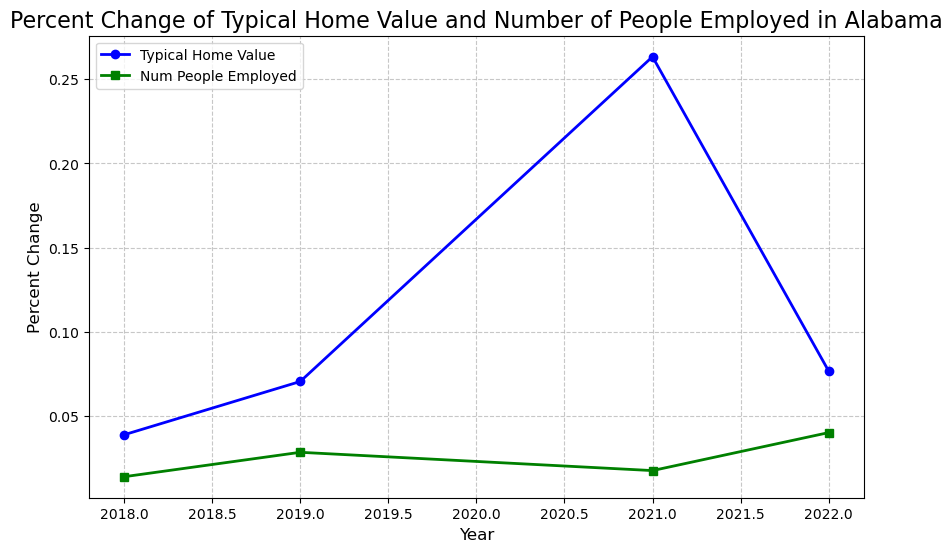

In [20]:
Alabama_data = df[df['RegionName'] == 'Alabama']
plt.figure(figsize=(10, 6))
plt.plot(Alabama_data['Year'], Alabama_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(Alabama_data['Year'], Alabama_data['Number of people employed'], label='Num People Employed', marker='s', linestyle='-', color='green', linewidth=2)
plt.title("Percent Change of Typical Home Value and Number of People Employed in Alabama", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percent Change", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

These two variables almost seem to be negatively correlated. This is the opposite of what I expected as I usually equate more people employed to a stronger economy and higher home prices. Let us see these two relationships in some other states.

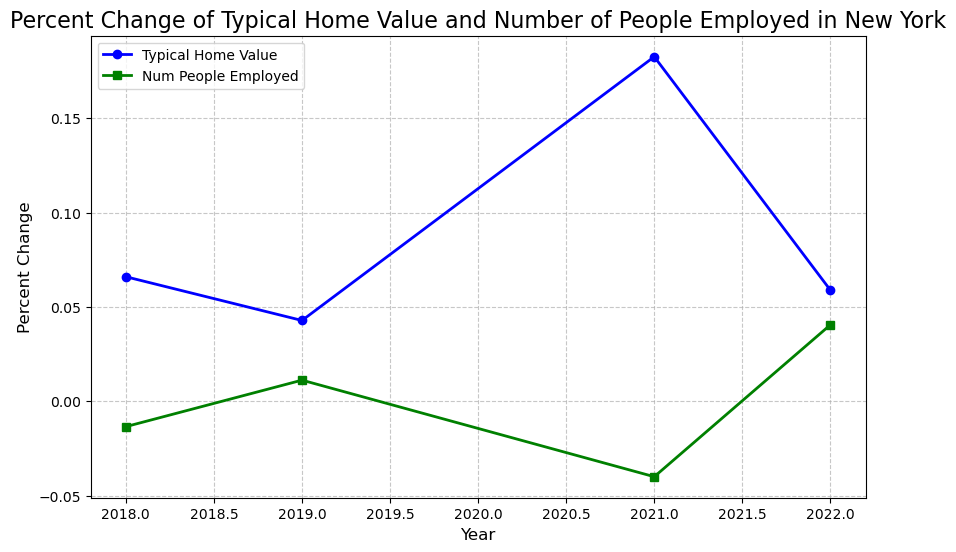

In [22]:
NewYork_data = df[df['RegionName'] == 'New York']
plt.figure(figsize=(10, 6))
plt.plot(NewYork_data['Year'], NewYork_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(NewYork_data['Year'], NewYork_data['Number of people employed'], label='Num People Employed', marker='s', linestyle='-', color='green', linewidth=2)
plt.title("Percent Change of Typical Home Value and Number of People Employed in New York", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percent Change", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We see the same trends in New York as well.

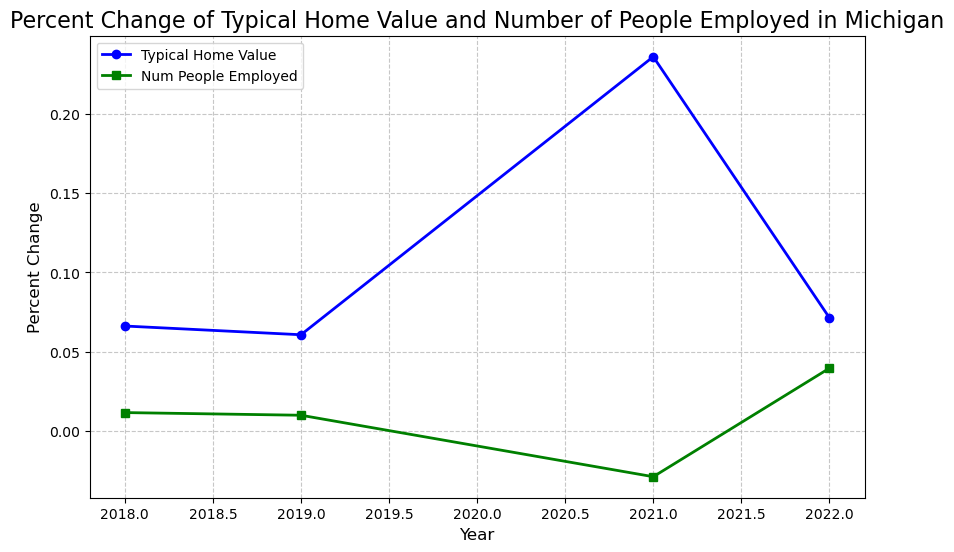

In [24]:
Michigan_data = df[df['RegionName'] == 'Michigan']
plt.figure(figsize=(10, 6))
plt.plot(Michigan_data['Year'], Michigan_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(Michigan_data['Year'], Michigan_data['Number of people employed'], label='Num People Employed', marker='s', linestyle='-', color='green', linewidth=2)
plt.title("Percent Change of Typical Home Value and Number of People Employed in Michigan", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percent Change", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Again we see it here. This is why EDA is crucial if you would like to uncover hidden truths about the data. Although we would guess employment and home value were positively correlated, this is not the case here. This may be due to COVID turning the world on its head as many unprecedented changes happened during that time. This could be detrimental since I want to predict home values under normal conditions.

Now I will make some box plots of some variables with potentially problematic values, prepping for the next section.

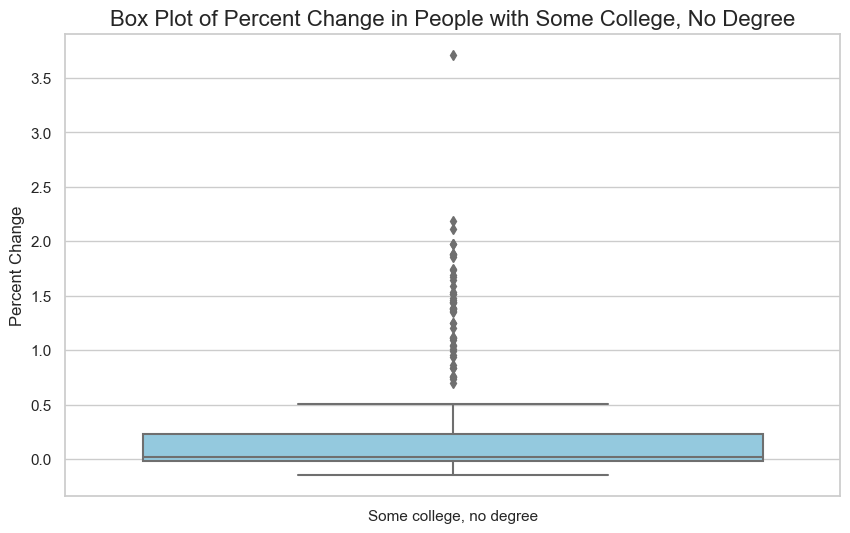

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Some college, no degree']], color='skyblue')
plt.title('Box Plot of Percent Change in People with Some College, No Degree', fontsize=16)
plt.ylabel('Percent Change', fontsize=12)
plt.show()

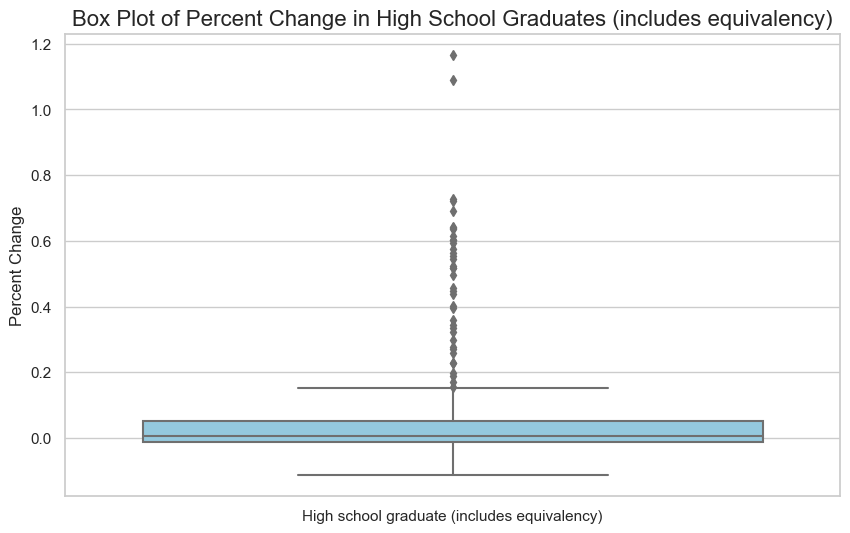

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['High school graduate (includes equivalency)']], color='skyblue')
plt.title('Box Plot of Percent Change in High School Graduates (includes equivalency)', fontsize=16)
plt.ylabel('Percent Change', fontsize=12)
plt.show()

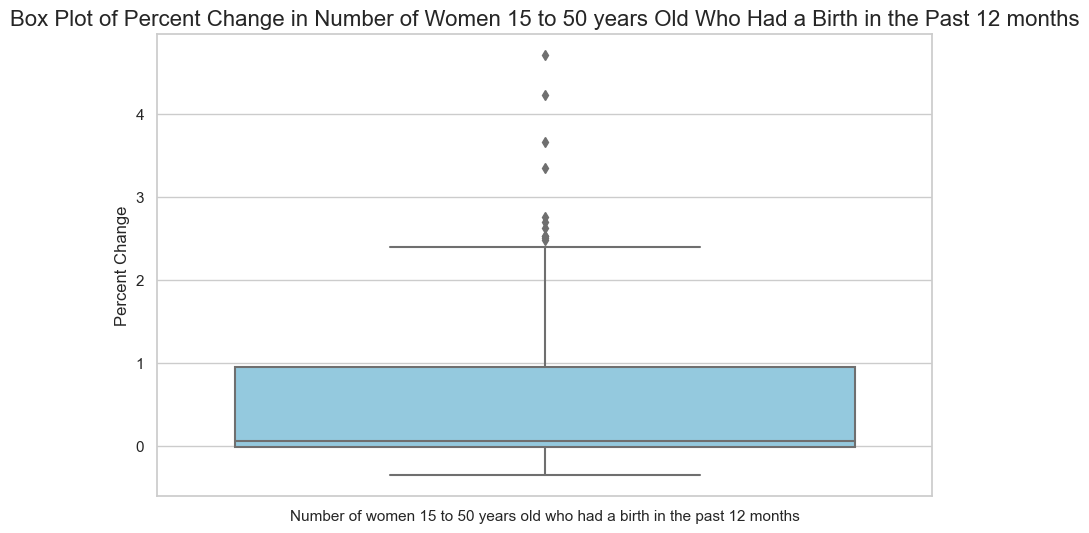

In [36]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Number of women 15 to 50 years old who had a birth in the past 12 months']], color='skyblue')
plt.title('Box Plot of Percent Change in Number of Women 15 to 50 years Old Who Had a Birth in the Past 12 months', fontsize=16)
plt.ylabel('Percent Change', fontsize=12)
plt.show()

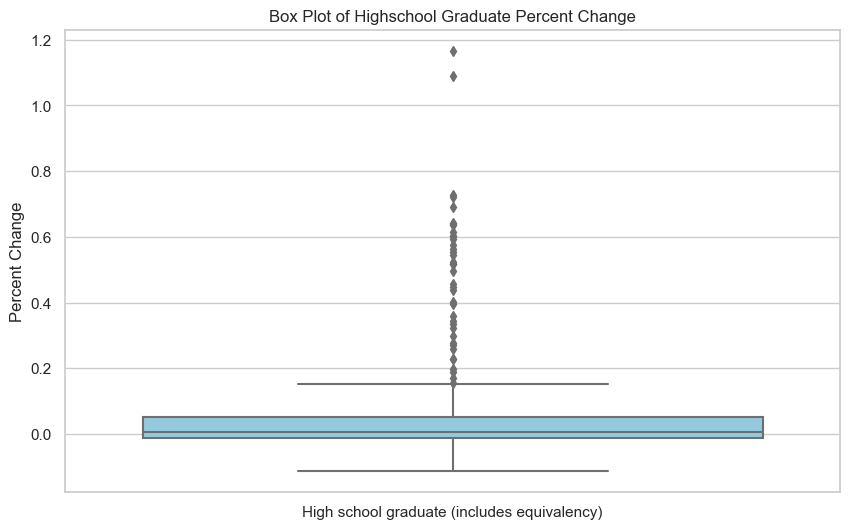

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['High school graduate (includes equivalency)']], color='skyblue')
plt.title('Box Plot of Highschool Graduate Percent Change')
plt.ylabel('Percent Change')
plt.show()

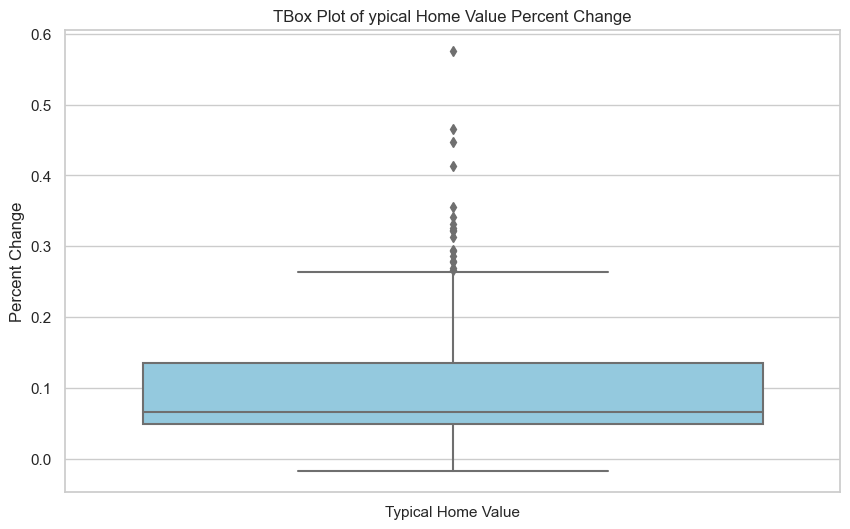

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Typical Home Value']], color='skyblue')
plt.title('TBox Plot of ypical Home Value Percent Change')
plt.ylabel('Percent Change')
plt.show()

As you can see, a reoccurring theme with these box plots are the many outliers, even with my target variable, especially a few data points that deviate very far from the median. I do not want to get rid of most of the outliers because I think they still have value, but the problematic points need to be removed so my analysis is not negatively affected.

# Outliers

Here I will make a data frame that detects outliers in each column that have a Z-score greater than 3.5 and outputs the row to find some problematic data points.

In [46]:
df2=df.drop(['Year','RegionName'],axis=1)
z=stats.zscore(df2)
outliers=df[(abs(z)>3.5).any(axis=1)]

In [49]:
outliers

,Year,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),...,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,RegionName,Typical Home Value
10,2021,0.055153,0.056519,0.063510,-0.009826,0.015737,-0.060886,-0.074551,-0.124297,-0.002245,...,-0.000330,0.005051,0.007833,-0.256084,-0.049722,-0.113205,0.014744,0.017542,Arizona,0.465593
18,2021,0.020610,0.004144,-0.013885,0.047402,0.002291,0.016327,0.014671,-0.077256,0.005821,...,-0.006944,0.012146,0.016216,-0.342397,-0.052871,0.667543,0.017400,0.011539,California,0.263897
34,2021,0.083419,0.083260,0.110537,0.092350,0.068272,0.025547,-0.030368,-0.152002,-0.007428,...,0.014126,0.012552,0.009434,-0.237309,-0.045173,0.066859,0.034113,0.029537,Florida,0.326356
42,2021,0.053258,0.069152,0.116342,0.055582,-0.143698,0.002767,-0.064805,-0.035668,-0.015822,...,0.018138,0.013000,0.015152,-0.063111,0.057980,-0.210801,-0.021324,0.061446,Hawaii,0.216170
43,2022,0.009686,-0.029597,-0.055693,0.103088,0.310981,-0.138189,-0.045804,0.054461,0.017893,...,-0.000941,0.001974,0.014925,-0.001749,-0.086856,-0.152367,-0.054849,-0.476645,Hawaii,0.119270
45,2019,0.024348,-0.183459,-0.220651,-0.411395,-0.851894,4.711793,-0.446483,-0.795935,0.045187,...,0.018730,-0.001976,0.002717,0.012729,0.052422,-0.006905,-0.039110,0.031601,Idaho,0.108631
46,2021,0.057974,0.079034,0.073181,0.571831,-0.045821,-0.150307,0.138723,0.079400,0.108126,...,0.063712,-0.001980,0.010840,-0.030580,0.120161,0.049110,0.001232,0.097702,Idaho,0.576048
50,2021,0.025819,0.021762,0.029648,0.059900,-0.051231,0.006543,0.027617,-0.071533,-0.026874,...,-0.000028,0.015576,0.010363,-0.140766,-0.037765,1.598558,0.014678,0.027537,Illinois,0.168975
72,2018,0.054252,0.037673,0.050175,-0.070806,0.065664,-0.024363,-0.124215,0.028409,0.086337,...,0.001869,0.000000,0.011211,-0.000125,0.157708,-0.082869,0.034703,0.023380,Maine,0.064244
75,2022,0.019730,0.015848,-0.026318,0.199123,-0.149499,0.034946,-0.098515,0.041105,0.033876,...,0.009541,0.013485,0.008949,0.013462,0.049219,0.474843,-0.032864,0.716742,Maine,0.106837


Considering how little data I have, this is a lot of rows to drop. I will keep them for now and possibly for the rest of my analysis. If I repeat this with more data I will be sure to drop the outliers.

# Correlation

In [51]:
df2.corr()

,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Mean Rent Paid,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,Typical Home Value
Total households,1.000000,0.438800,0.465624,0.248086,0.336708,-0.260457,0.312382,0.287555,-0.294137,-0.318927,...,0.421822,0.390172,0.331799,0.277745,-0.536511,-0.153728,0.009718,0.049971,0.088902,0.578869
Married couple households,0.438800,1.000000,0.981878,0.790430,0.945954,-0.831271,0.757746,0.931202,-0.766019,-0.920144,...,0.497780,0.276947,0.331144,0.021856,-0.274077,-0.166218,0.019215,0.078385,0.021463,0.444488
Married couple with children of the householder under 18 years,0.465624,0.981878,1.000000,0.771685,0.943687,-0.815491,0.781559,0.917415,-0.774410,-0.906359,...,0.499087,0.241894,0.325107,0.017160,-0.278718,-0.198401,-0.003718,0.081323,0.027813,0.447811
"Male householder,no spouse/partner present with children of the householder under 18 years",0.248086,0.790430,0.771685,1.000000,0.797750,-0.742020,0.682252,0.800932,-0.621534,-0.745090,...,0.412152,0.194073,0.243893,0.024614,-0.212158,-0.045523,0.056621,0.111638,0.158003,0.364732
"Female householder, no spouse/partner present with children of the householder under 18 years",0.336708,0.945954,0.943687,0.797750,1.000000,-0.894087,0.803087,0.972320,-0.749640,-0.896076,...,0.438733,0.151822,0.228283,0.085614,-0.219316,-0.214236,0.019388,0.115063,-0.051127,0.338099
Number of women 15 to 50 years old who had a birth in the past 12 months,-0.260457,-0.831271,-0.815491,-0.742020,-0.894087,1.000000,-0.711113,-0.893892,0.592598,0.785771,...,-0.411501,-0.118924,-0.275845,-0.072924,0.213962,0.149411,-0.005464,-0.171662,0.015633,-0.327840
Less than 9th grade,0.312382,0.757746,0.781559,0.682252,0.803087,-0.711113,1.000000,0.782436,-0.655789,-0.724942,...,0.460252,0.192067,0.237910,0.159691,-0.212471,-0.298075,0.009762,0.029356,-0.046078,0.297504
"9th to 12th grade,no diploma",0.287555,0.931202,0.917415,0.800932,0.972320,-0.893892,0.782436,1.000000,-0.752483,-0.875352,...,0.424624,0.179373,0.191868,0.090643,-0.152399,-0.195105,0.055358,0.137906,-0.017625,0.290155
High school graduate (includes equivalency),-0.294137,-0.766019,-0.774410,-0.621534,-0.749640,0.592598,-0.655789,-0.752483,1.000000,0.625286,...,-0.423344,-0.185994,-0.201587,-0.058643,0.172882,0.132303,0.004590,-0.111726,0.009065,-0.296042
"Some college, no degree",-0.318927,-0.920144,-0.906359,-0.745090,-0.896076,0.785771,-0.724942,-0.875352,0.625286,1.000000,...,-0.410235,-0.127849,-0.290762,-0.002780,0.222860,0.165423,-0.042741,-0.026843,0.002079,-0.339538


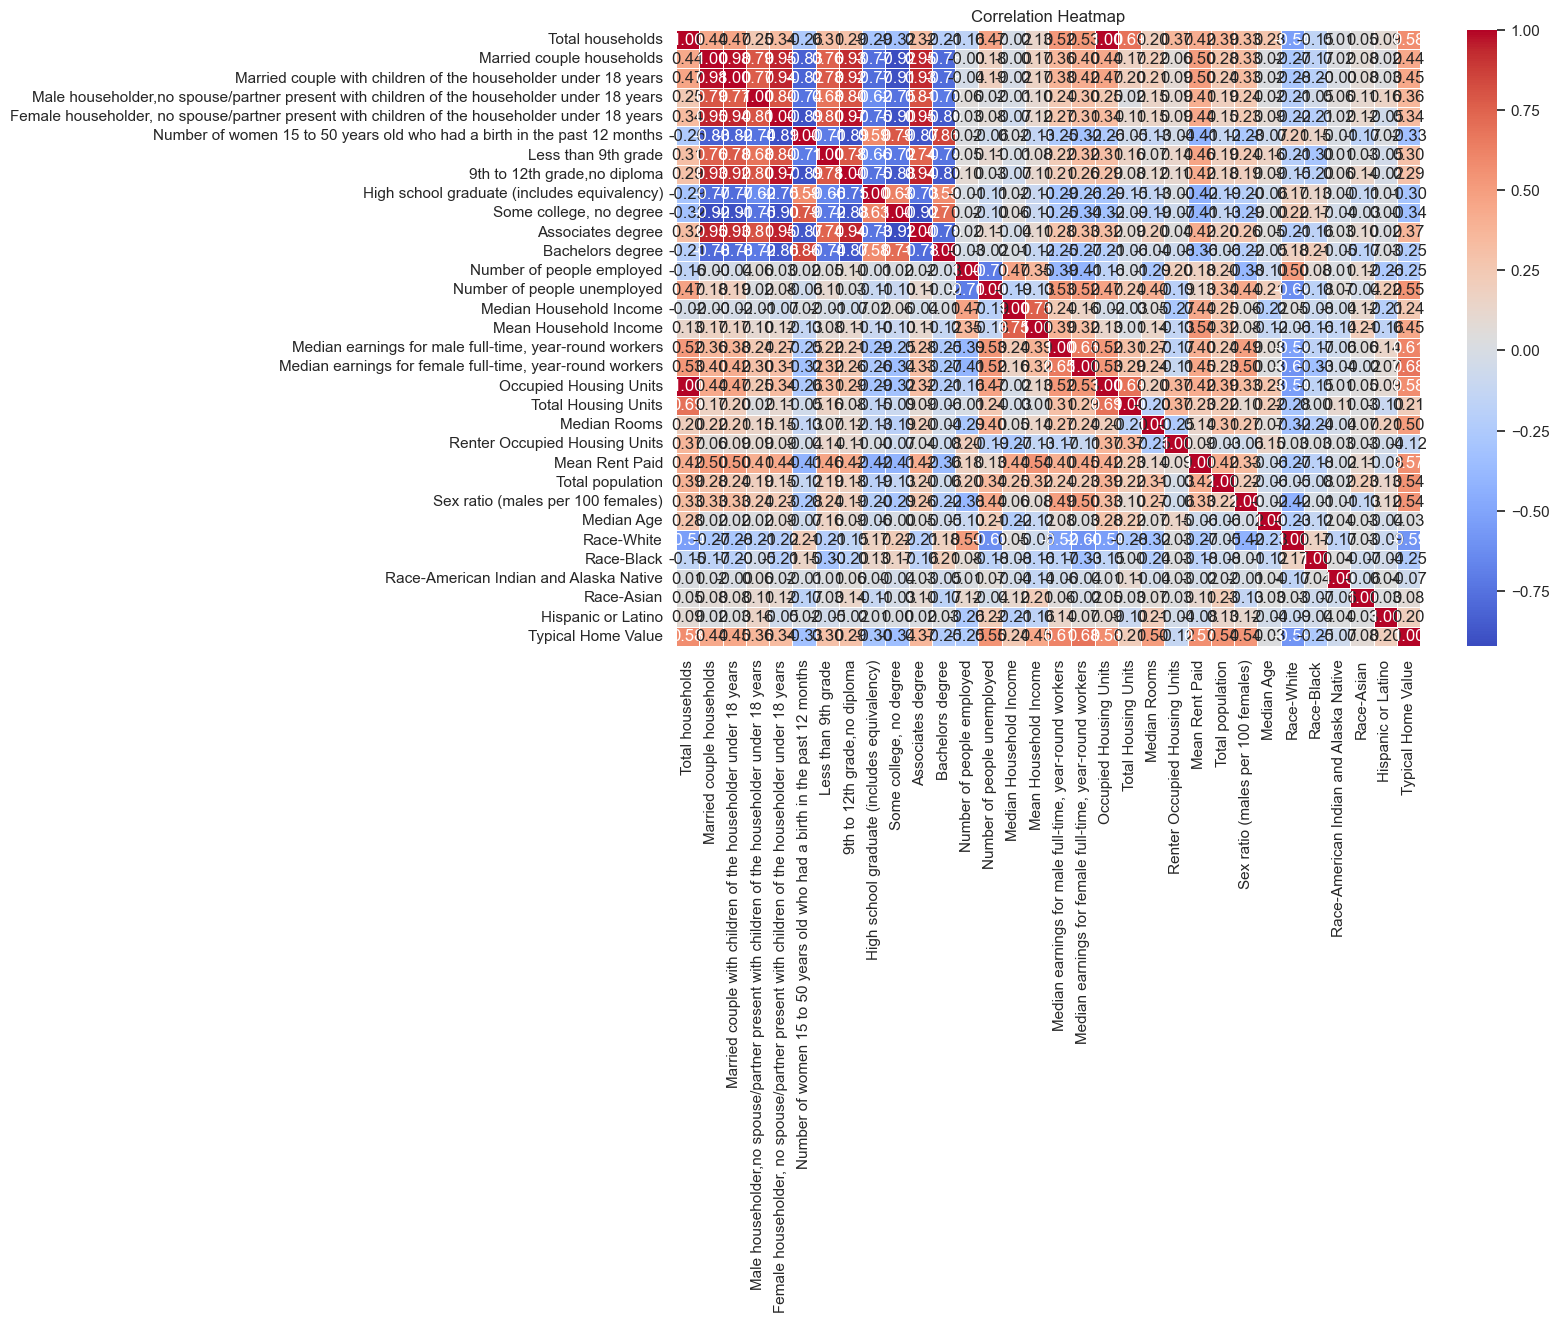

In [52]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Many Variables are highly correlated. More on this in the dimensionality reduction section.